# Data Wrangling 

## Import Libraries 

In [157]:
import pandas as pd 
import requests 
import os
import zipfile 

## Step 1: Gathering Data 

### Gather Twitter Archive Enhanced Data 

In [158]:
# Read the csv file
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

### Gather Image Predictions Data 

In [159]:
# Use the request code to get a response
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [160]:
# Open the file 
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [161]:
# Read the tsv file 
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### Gather Tweets_json Data 

In [162]:
# Extract contents from zip file
with zipfile.ZipFile('tweet-json.zip', 'r') as myzip:
    myzip.extractall()

In [163]:
# Read the json file
df_tweet_json = pd.read_json('tweet-json copy', lines=True)

In [164]:
# Choose the columns to include in the data frame
df_tweet_json = df_tweet_json[['id','retweet_count','favorite_count']]

## Step 2: Assessing Data 

### Visual Assessment 

In [165]:
df_twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [166]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [167]:
df_tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatic Assessment

#### Twitter Archive: 

In [168]:
# Read df_twitter_archive_enhanced dataset general information:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [169]:
# Find retweeted rows 
df_twitter_archive_enhanced[df_twitter_archive_enhanced['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [170]:
# Find reply's rows
df_twitter_archive_enhanced[df_twitter_archive_enhanced['in_reply_to_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [171]:
# Check if there are incorrect rating denominators and numerator
df_twitter_archive_enhanced[df_twitter_archive_enhanced['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [172]:
# Check the values of the incorrect denominators 
df_twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Image Predictions: 

In [173]:
# Read df_image_predictions dataset general information
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Tweet Json: 

In [174]:
# Check the data randomly
df_tweet_json.sample(5)

,id,retweet_count,favorite_count
1430,697482927769255936,765,2662
1859,675483430902214656,1081,1985
2158,669567591774625800,61,248
2072,670842764863651840,4324,7989
1118,731156023742988288,1434,4196


In [175]:
# Check the dataset descriptive Statistics
df_tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [176]:
# Read df_tweet_json dataset general information:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [177]:
# Check duplicates among the three data frames
all_columns = pd.Series(list(df_twitter_archive_enhanced) + list(df_tweet_json) + list(df_image_predictions))
all_columns[all_columns.duplicated()]

20    tweet_id
dtype: object

### Quality Issues

#### Twitter Archive:

**1- Date type for timestamp and retweeted_status_timestamp columns instead of object type**

**2- String type for tweet_id instead of integer**

**3- Remove retweets and replies from df_twitter_archive_enhanced data frame**

**4- Fix incorrect numerator values**

**5- Fix incorrect denominator values**

**6- Remove un-needed columns like the retweets and replies information** 

#### Image Predictions:

**7- String type for tweet_id instead of integer**

#### Tweet Json:

**8- String type for id instead of integer**

**9- Different id column name in comparison  other 'tweet_id' column name**

### Tidiness Issues 

#### Twitter Archive:

**1- Dogs stage column instead of various columns for: doggo, floofer, pupper, and puppo**


#### Tweet Json:

**2- Retweets and favorites information can be joined to the other data frames**



## Step 3: Cleaning Data 

### Twitter Archive Dataset Cleaning 

In [178]:
# Make a copy of the original data set
clean_twitter_archive_enhanced = df_twitter_archive_enhanced.copy()

### Quality Issues:

#### Define:

**1- Change data type for timestamp and retweeted_status_timestamp columns from object type to date type using pandas to_datetime code**

**2- Change data type for tweet_id from integer to string using astype code**

#### Code:

In [179]:
# Change timestamp column datatype from string to date type
clean_twitter_archive_enhanced['timestamp'] = pd.to_datetime(clean_twitter_archive_enhanced['timestamp'])

In [180]:
# Change retweeted_status_timestamp column datatype from string to date type
clean_twitter_archive_enhanced['retweeted_status_timestamp'] = pd.to_datetime(clean_twitter_archive_enhanced['retweeted_status_timestamp'])

In [181]:
# Change tweet_id column datatype from integer to string
clean_twitter_archive_enhanced['tweet_id'] = clean_twitter_archive_enhanced['tweet_id'].astype('str')

#### Test:

In [182]:
# Test the cleaning process by looking at the general information of the data set
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define:
**3- Remove retweets and replies from df_twitter_archive_enhanced data frame using drop code**

#### Code:

In [183]:
# Delete retweets rows
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop(clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['retweeted_status_id'].notnull()].index)

In [184]:
# Delete replies rows 
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop(clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['in_reply_to_status_id'].notnull()].index)

#### Test:

In [185]:
# check the success of deleting both retweets and replies rows from the data frame  
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### Define:

**4- Fix incorrect numerator values by extracting the numerator values from the text column using str.extract code**

**5- Fix incorrect denominator values by extracting the denominator values from the text column using str.extract code**

#### Code:

In [186]:
# Extract rating numerator from the text column
clean_twitter_archive_enhanced['rating_numerator'] = clean_twitter_archive_enhanced['text'].str.extract('(\d+)\/\d+')

In [187]:
# Extract rating denominator from the text column
clean_twitter_archive_enhanced['rating_denominator'] = clean_twitter_archive_enhanced['text'].str.extract('\d+\/(\d+)')

#### Test:

In [188]:
# Check the success of extracting both rating numerator and rating denominator from the text column 
clean_twitter_archive_enhanced['rating_numerator'].value_counts() , clean_twitter_archive_enhanced['rating_denominator'].value_counts() 

(12      486
 10      436
 11      413
 13      287
 9       153
 8        98
 7        52
 14       38
 5        34
 6        32
 3        19
 4        16
 2         9
 1         5
 0         1
 75        1
 24        1
 121       1
 44        1
 45        1
 27        1
 165       1
 1776      1
 50        1
 60        1
 204       1
 80        1
 88        1
 420       1
 26        1
 144       1
 84        1
 99        1
 Name: rating_numerator, dtype: int64,
 10     2080
 50        3
 80        2
 11        2
 120       1
 90        1
 40        1
 20        1
 70        1
 110       1
 7         1
 170       1
 150       1
 2         1
 Name: rating_denominator, dtype: int64)

#### Define: 
**6- Remove un-needed columns like the retweets and replies information by deleting it using drop code** 

#### Code: 

In [189]:
# Delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp 
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)

#### Test:

In [190]:
# Check the success of deleting un-needed columns 
clean_twitter_archive_enhanced.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Tidiness Issues:

#### Define:
**1- Combine the different dog stages (ex. doggo, floofer, pupper, and puppo) into one column using combine method**

#### Code:

In [191]:
def combine(cell):
    k= 0 #The counter for the rows
    dog_stage = "" #column name 
    
    if cell.doggo == "doggo": 
        dog_stage = "doggo"
        k += 1
    
    if cell.floofer == "floofer":
        dog_stage = "floofer"
        k += 1
    
    if cell.pupper == "pupper":
        dog_stage = "pupper"
        k += 1
   
    if cell.pupper == "puppo":
        dog_stage = "puppo"
        k += 1
   
    if k==0:
        return "None" # Return null value if neither doggo, floofer, pupper or puppo dog stage is there so far
    elif k==1:
        return dog_stage # Add the dog stage that is found to the column "dog_stage"
    else:
        return "mix" # Return mix dog stage if there are more than one type 
    
# Apply the combine to the chosen data set which is twitter archive     
clean_twitter_archive_enhanced['dog_stage'] = clean_twitter_archive_enhanced[['doggo','floofer','pupper','puppo']].apply(combine,axis=1)

In [192]:
# Delete use less seperated dog stage columns 
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

#### Test:

In [193]:
# Check the success of combining the seperated dog stages columns and deleting un-needed columns after combining  
clean_twitter_archive_enhanced.dog_stage.value_counts()

None       1784
pupper      221
doggo        73
mix          10
floofer       9
Name: dog_stage, dtype: int64

### Image Predictions Dataset Cleaning 

In [194]:
# Make a copy of the original data set
clean_image_predictions = df_image_predictions.copy()

### Quality Issues: 

#### Define:
**7- Change data type for tweet_id from integer to string using astype code**

#### Code:

In [195]:
# Change tweet_id column datatype from integer to string
clean_image_predictions['tweet_id'] = clean_image_predictions['tweet_id'].astype('str')

#### Test:

In [196]:
# Test the cleaning process by looking at the general information of the data set
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tweet Json Cleaning 

### Quality Issues: 

In [197]:
# Make a copy of the original data set
clean_tweet_json = df_tweet_json.copy()

#### Define:
**8- Change data type for id from integer to string using astype code**


#### Code:

In [198]:
# Change id column datatype from integer to string
clean_tweet_json['id'] = clean_tweet_json['id'].astype('str')

#### Test:

In [199]:
# Test the cleaning process by looking at the general information of the data set
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Define:
**9- Change id column name into tweet_id to be consistent with other data frames using rename method**

#### Code:

In [200]:
# Rename the id column to be consistent with other tweet_id columns 
clean_tweet_json.rename(columns = {"id": "tweet_id"}, inplace = True)

#### Test:

In [201]:
# Check the success of changing column name 
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Tidiness Issues:

#### Define:
**2-  Join the three data frames into one data frame using merge method**




#### Code:

In [202]:
# Merge two tables 
twitter_archive_cleaned = pd.merge(clean_twitter_archive_enhanced,clean_tweet_json, on=['tweet_id'], how='left')


In [203]:
# Merge the third table 'clean_image_predictions' with the merged one twitter_archive_cleaned
twitter_archive_cleaned = pd.merge(twitter_archive_cleaned, clean_image_predictions, on=['tweet_id'], how='left')

#### Test:

In [204]:
# Check the final cleaned table 
twitter_archive_cleaned

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,41,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2093,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,147,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2094,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,47,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2095,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,48,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Final Step: Save Data

In [253]:
# Export the dataset as csv file: 
twitter_archive_cleaned.to_csv('twitter_archive_master.csv', index = False, header=True)

# Visualization

In [247]:
from IPython.display import Image
from IPython.core.display import HTML

## Insight No.1:

#### Most popular dog whom got the highest retweets:

In [245]:
twitter_archive_cleaned.retweet_count.max() 

79515

In [249]:
highest_retweets = twitter_archive_cleaned[twitter_archive_cleaned['retweet_count'] == 79515]
highest_retweets 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
825,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [250]:
Image(url= highest_retweets.jpg_url.values[0],width=150)

#### Most popular dog whom got the highest favorites:

In [208]:
twitter_archive_cleaned.favorite_count.max()

132810

In [251]:
highest_favorites = twitter_archive_cleaned[twitter_archive_cleaned['favorite_count'] == 132810]
highest_favorites

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
325,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,None,48265,...,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [252]:
Image(url= highest_favorites.jpg_url.values[0],width=200)

## Insight No.2:

#### The most frequent ratings that WeRateDogs account give to dogs 

In [210]:
twitter_archive_cleaned.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
0         1
75        1
24        1
121       1
44        1
45        1
27        1
165       1
1776      1
50        1
60        1
204       1
80        1
88        1
420       1
26        1
144       1
84        1
99        1
Name: rating_numerator, dtype: int64

## Insight No.3:

#### the times that each prediction number algorithm is whether or not a breed of dog was true 

In [244]:
len(twitter_archive_cleaned[twitter_archive_cleaned.p1_dog == True]), len(twitter_archive_cleaned[twitter_archive_cleaned.p2_dog == True]), len(twitter_archive_cleaned[twitter_archive_cleaned.p3_dog == True]) 

(1463, 1480, 1431)

## Visualizing 

#### The portions of each dog stage based on their retweet count

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8141cf8dd0>],
      dtype=object)

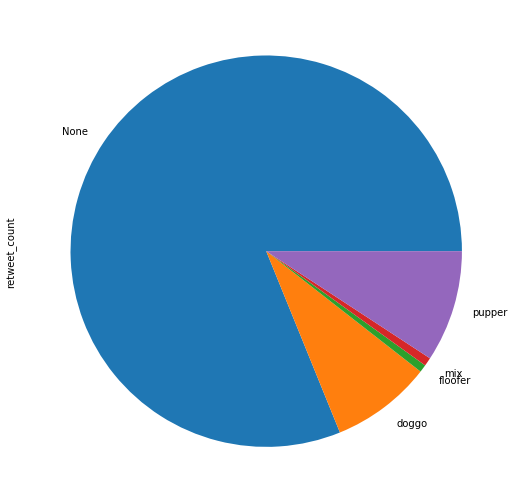

In [213]:
twitter_archive_cleaned.groupby(['dog_stage']).sum()['retweet_count'].plot.pie(subplots=True, figsize=(12, 9))